In [1]:
import multi_experiment
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


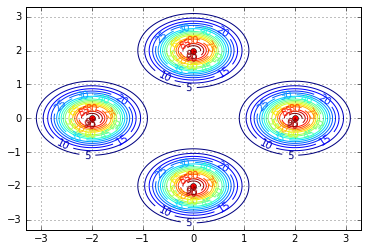

In [2]:
dqn_hidden_spec = [
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh}
            ]
exp = multi_experiment.Experiments(action_res=[5,5],discount=0.7,dqn_hidden_spec=dqn_hidden_spec,max_epi=10000,max_step=20,
                             batch_size=2000,learning_rate=1e-4,target_update_period=25,
                             replay_memory_size=50000,eps_decay_rate=0.99995, strategy="Sparsemax",scale=5.)
fig = plt.figure()
exp.env.render()

In [3]:
_ = exp.run(display_period=500)

[500/10000] Avg Total Reward 46.0521803413, DQN Loss 2.43587362021, Epsilon 0.606553405544
[1000/10000] Avg Total Reward 296.285318247, DQN Loss 7.66260102391, Epsilon 0.368348798268
[1500/10000] Avg Total Reward 560.175744695, DQN Loss 10.2078064978, Epsilon 0.224430913305
[2000/10000] Avg Total Reward 711.413518017, DQN Loss 9.63257585466, Epsilon 0.136784342718
[2500/10000] Avg Total Reward 796.972624099, DQN Loss 10.0587373525, Epsilon 0.0833037150745
[3000/10000] Avg Total Reward 846.545475896, DQN Loss 11.1501285285, Epsilon 0.0507382848814


KeyboardInterrupt: 

Evaluation Result: 922.979233093


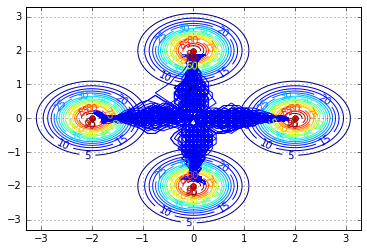

In [6]:
eval_list, info_list = exp.evaluation(max_eval_epi=500)
exp.env.plot_paths(info_list)

In [7]:
info_list

[{'env_infos': {'goal_id': array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1., -1., -1., -1., -1., -1., -1.]),
   'pos': array([[  0.00000000e+00,   0.00000000e+00],
          [  1.50000000e-01,   1.50000000e-01],
          [  3.00000000e-01,   2.25000000e-01],
          [  4.50000000e-01,   1.50000000e-01],
          [  6.00000000e-01,   7.50000000e-02],
          [  7.50000000e-01,   2.25000000e-01],
          [  9.00000000e-01,   2.25000000e-01],
          [  1.05000000e+00,   7.50000000e-02],
          [  1.20000000e+00,   1.50000000e-01],
          [  1.35000000e+00,   7.50000000e-02],
          [  1.50000000e+00,   7.50000000e-02],
          [  1.65000000e+00,  -7.50000000e-02],
          [  1.80000000e+00,  -7.50000000e-02],
          [  1.80000000e+00,  -4.16333634e-17],
          [  1.87500000e+00,  -7.50000000e-02],
          [  1.87500000e+00,  -7.50000000e-02],
          [  1.87500000e+00,  -7.50000000e-02],
          [  1.87500000e+0